In [1]:
!pip install pytorch-tabnet wget
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from IPython.display import display; 
np.random.seed(0)


import os
import wget
from pathlib import Path
import shutil
import gzip

from matplotlib import pyplot as plt
%matplotlib inline

random_state=42
sns.set(style="whitegrid")

# Load dataset

Read the dataset;
drop columns
drop NA
drop duplicates

In [8]:
#df = pd.read_csv('../data/2022_combined.csv', low_memory=False)

df = pd.read_csv('../data/2022_combined.csv', low_memory=False)

print(df.columns)

Index(['uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std',

In [4]:
df.corr()

id.orig_p  id.resp_p     proto  missed_bytes  orig_pkts  \
id.orig_p              1.000000  -0.070038 -0.027265     -0.012376  -0.001647   
id.resp_p             -0.070038   1.000000  0.216866     -0.007873   0.000810   
proto                 -0.027265   0.216866  1.000000     -0.016054  -0.001434   
missed_bytes          -0.012376  -0.007873 -0.016054      1.000000  -0.000088   
orig_pkts             -0.001647   0.000810 -0.001434     -0.000088   1.000000   
...                         ...        ...       ...           ...        ...   
idle.std              -0.036461   0.004381  0.254080     -0.006440   0.000229   
fwd_init_window_size   0.183025   0.173290 -0.250897     -0.020394  -0.000689   
bwd_init_window_size  -0.021825  -0.083776 -0.170620      0.093771   0.001098   
fwd_last_window_size   0.148021   0.198237 -0.230642     -0.018667  -0.001179   
bwd_last_window_size  -0.074199  -0.073963 -0.150793      0.106688   0.000620   

                      orig_ip_bytes  resp_pkts  resp_ip_bytes  fwd_pkts_tot  \
id.orig_p                  0.000328   0.001462       0.001490     -0.001647   
id.resp_p                  0.003083   0.002532       0.000433      0.000810   
proto                     -0.003257  -0.003132      -0.001049     -0.001434   
missed_bytes              -0.000245   0.000092      -0.000019     -0.000088   
orig_pkts                  0.887789   0.735325       0.175796      1.000000   
...                             ...        ...            ...           ...   
idle.std                  -0.000136  -0.000701      -0.000300      0.000229   
fwd_init_window_size       0.004868   0.000980       0.000031     -0.000689   
bwd_init_window_size       0.009765   0.008312       0.002004      0.001098   
fwd_last_window_size      -0.002919  -0.001524      -0.000799     -0.001179   
bwd_last_window_size       0.000115   0.005865       0.001140      0.000620   

                      bwd_pkts_tot  ...  active.std  idle.min  idle.max  \
id.orig_p                 0.001462  ...    0.003650 -0.032326 -0.043022   
id.resp_p                 0.002532  ...    0.001431 -0.006770 -0.001993   
proto                    -0.003132  ...    0.002166  0.319867  0.379227   
missed_bytes              0.000092  ...   -0.000267 -0.003976 -0.006378   
orig_pkts                 0.735325  ...    0.028320  0.000105  0.000240   
...                            ...  ...         ...       ...       ...   
idle.std                 -0.000701  ...    0.003193  0.214131  0.653805   
fwd_init_window_size      0.000980  ...    0.008294 -0.117774 -0.133515   
bwd_init_window_size      0.008312  ...    0.017192 -0.048708 -0.061522   
fwd_last_window_size     -0.001524  ...   -0.004456 -0.141020 -0.155904   
bwd_last_window_size      0.005865  ...    0.001426 -0.080445 -0.092767   

                      idle.tot  idle.avg  idle.std  fwd_init_window_size  \
id.orig_p            -0.013018 -0.038898 -0.036461              0.183025   
id.resp_p            -0.001688 -0.004542  0.004381              0.173290   
proto                 0.267027  0.362348  0.254080             -0.250897   
missed_bytes         -0.006339 -0.005447 -0.006440             -0.020394   
orig_pkts             0.009261  0.000180  0.000229             -0.000689   
...                        ...       ...       ...                   ...   
idle.std              0.511981  0.465709  1.000000             -0.088440   
fwd_init_window_size -0.061373 -0.129860 -0.088440              1.000000   
bwd_init_window_size  0.003899 -0.056757 -0.053140             -0.000702   
fwd_last_window_size -0.121709 -0.153953 -0.092297              0.915250   
bwd_last_window_size -0.074338 -0.089968 -0.060292             -0.154556   

                      bwd_init_window_size  fwd_last_window_size  \
id.orig_p                        -0.021825              0.148021   
id.resp_p                        -0.083776              0.198237   
proto                            -0.170620             -0.230642   
missed_bytes  

In [3]:
from mlciic import functions

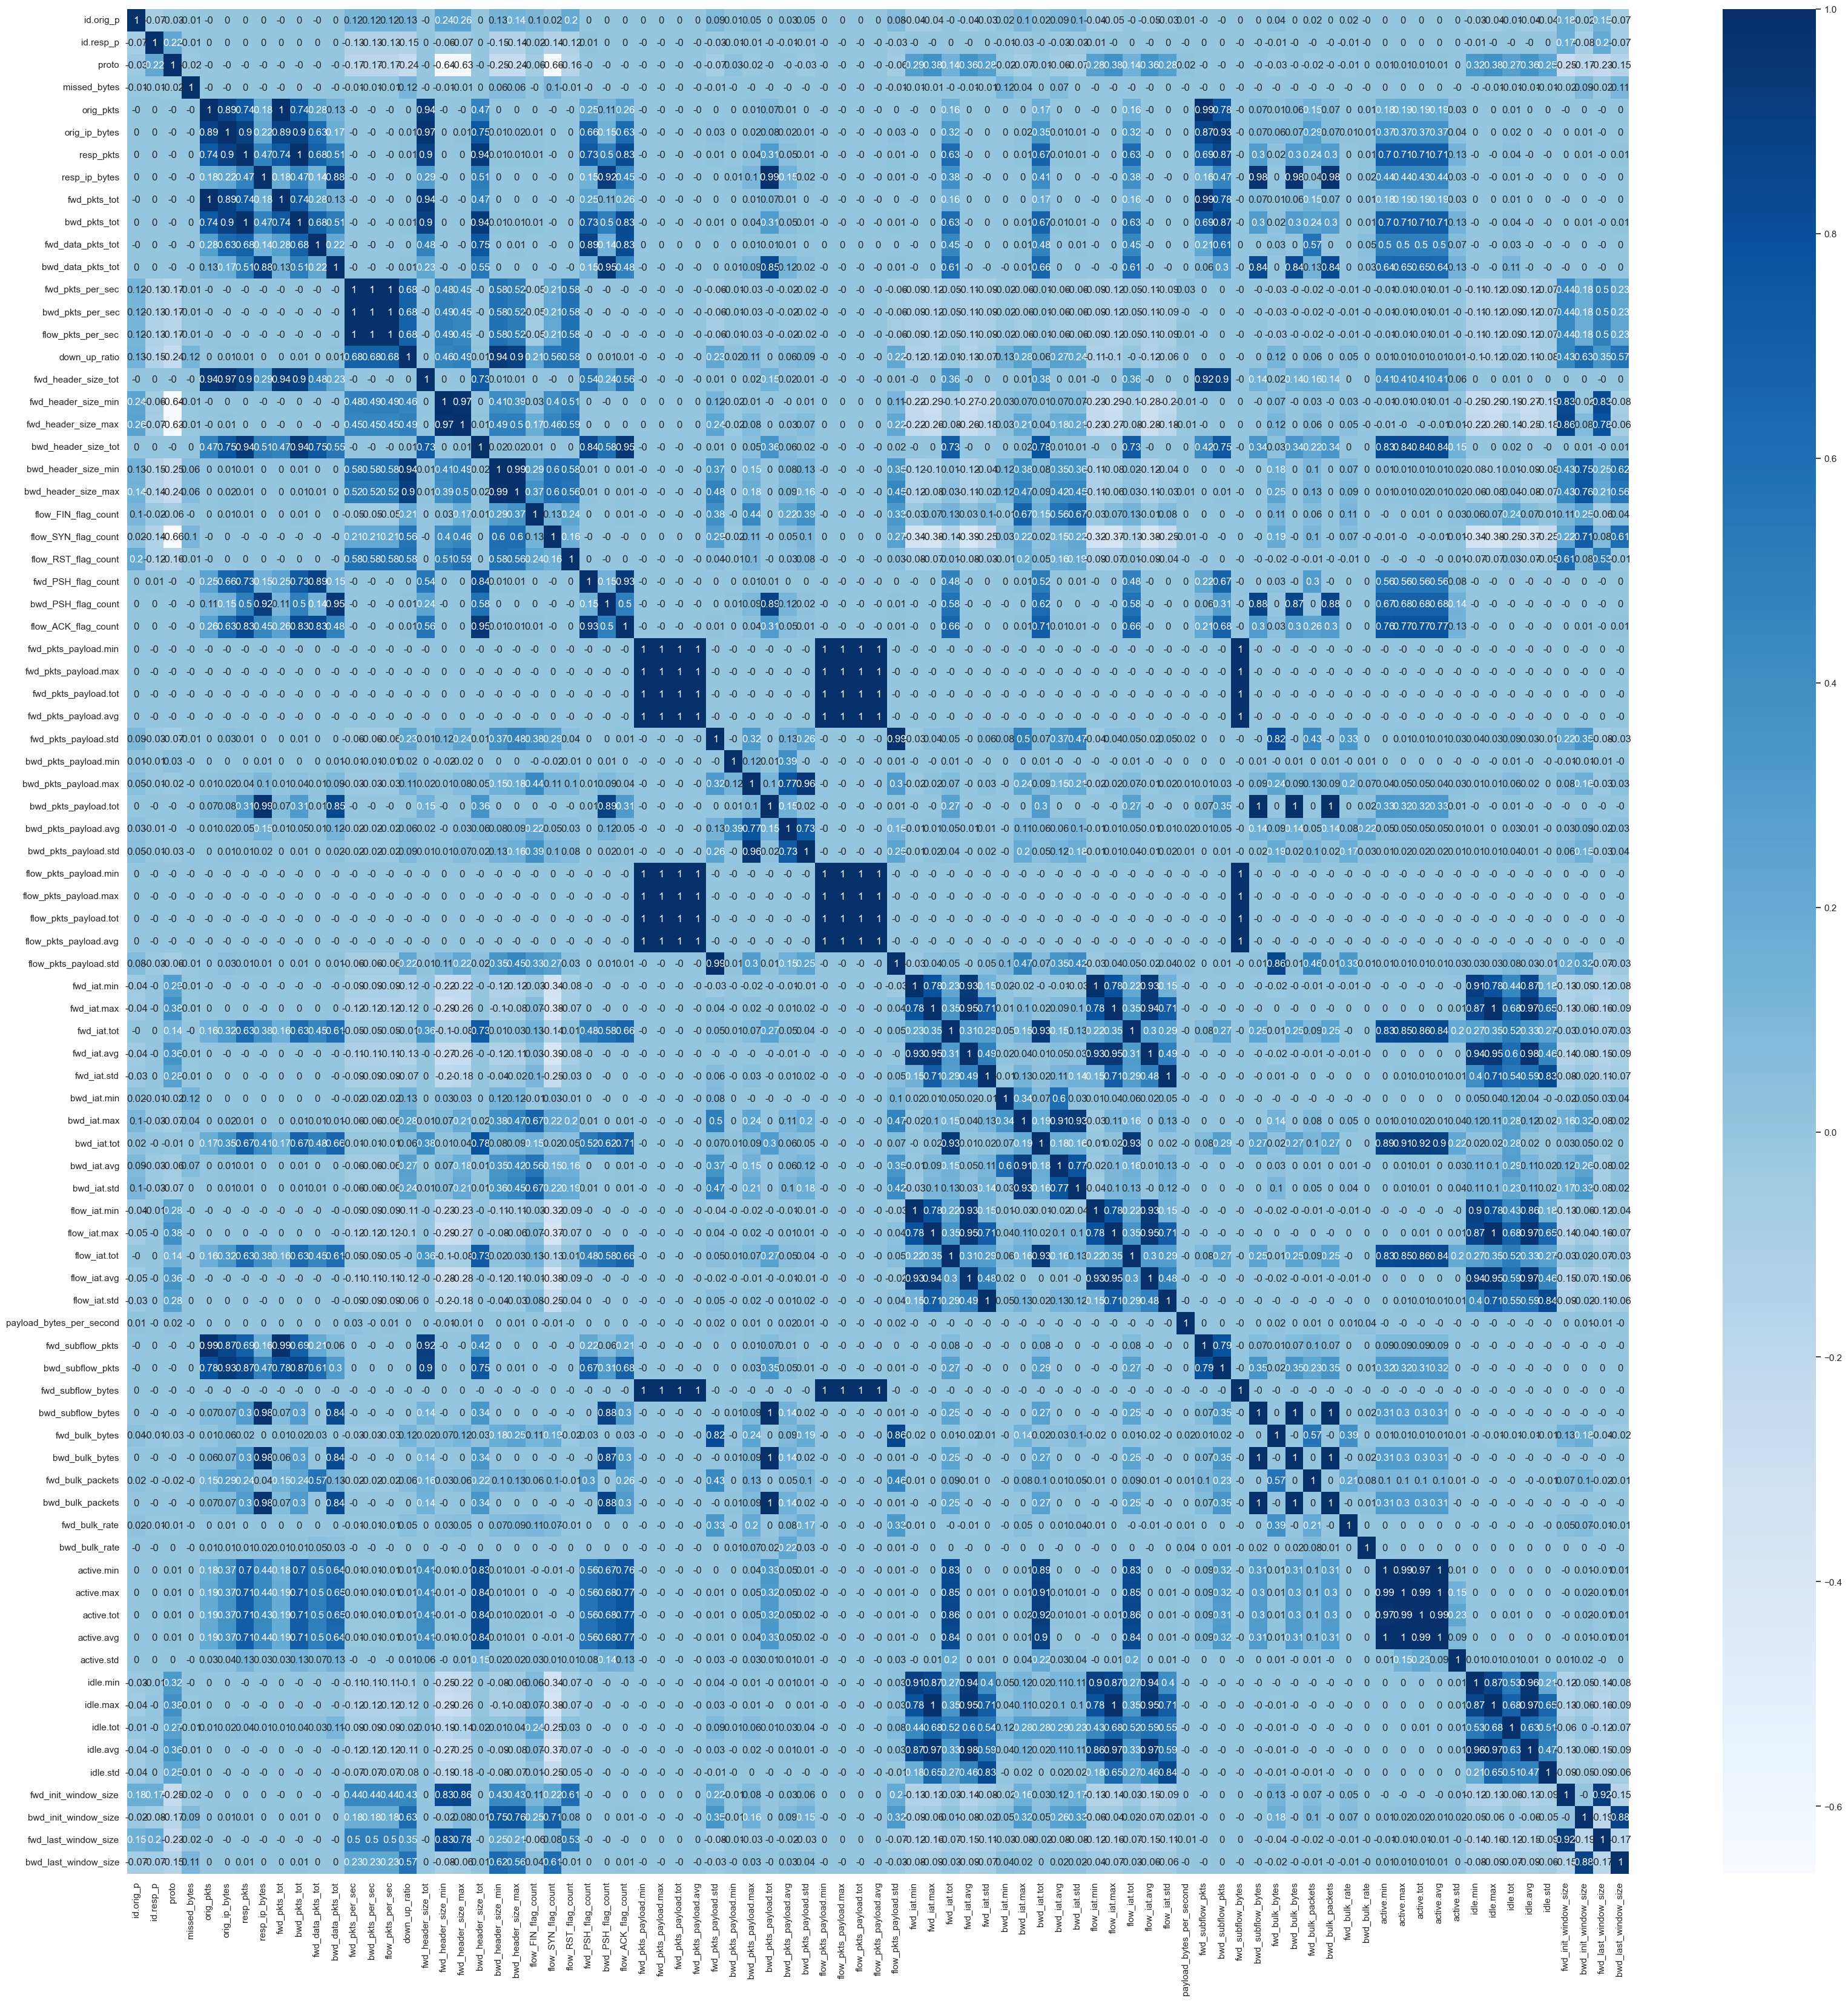

In [9]:
corr = df.corr().round(2)
plt.figure(figsize=(40, 40))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [17]:
df = pd.read_csv('../data/DNN-EdgeIIoT-dataset.csv', low_memory=False)

print(df.columns)

print(df["Attack_type"].unique())

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [3]:


drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

KeyError: "['frame.time' 'ip.src_host' 'ip.dst_host' 'arp.src.proto_ipv4'\n 'arp.dst.proto_ipv4' 'http.file_data' 'http.request.full_uri'\n 'icmp.transmit_timestamp' 'http.request.uri.query' 'tcp.options'\n 'tcp.payload' 'tcp.srcport' 'tcp.dstport' 'udp.port' 'mqtt.msg'] not found in axis"

In [7]:
categorical_columns = []
for col in df.columns[df.dtypes == object]:
    if col != "Attack_type":
        categorical_columns.append(col)

featuresFromStart = [ col for col in df.columns if col not in ["Attack_label"]+["Attack_type"]]
print("-----Features from the start-----")
print(featuresFromStart)
print("-----Categorial features-----")
print(categorical_columns)
print("-----Categorial features UNIQUENESS-----")
for col in categorical_columns:
    #print(df[col].unique())
    print(df[col].value_counts())
    
print("-----All features UNIQUENESS-----")
for col in featuresFromStart:
    #print(df[col].unique())
    print(df[col].value_counts())

-----Features from the start-----
['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.unused', 'http.content_length', 'http.request.method', 'http.referer', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']
-----Categorial features-----
['http.request.method', 'http.referer', 'http.request.version', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protonam

In [8]:
df = pd.get_dummies(df, columns=categorical_columns)
featuresDummies = [ col for col in df.columns if col not in ["Attack_label"]+["Attack_type"]]
print(featuresDummies)

['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'http.request.method_0', 'http.request.method_0.0', 'http.request.method_GET', 'http.request.method_OPTIONS', 'http.request.method_POST', 'http.request.method_PROPFIND', 'http.request.method_PUT', 'http.request.method_SEARCH', 'http.request.method_TRACE', 'http.referer_() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278:

In [9]:
# Create a new dataframe with the summary information
summary_df = pd.DataFrame(columns=['Data Type', 'Column Name', 'Unique Values'])

# Iterate through the columns of the original dataframe
for col in df.columns:
    # Get the data type of the column
    dtype = df[col].dtype
    # Get the column name
    col_name = col
    # Get the unique values of the column
    unique_values = df[col].unique()
    # Append a new row to the summary dataframe
    summary_df = summary_df.append({'Data Type': dtype, 'Column Name': col_name, 'Unique Values': unique_values}, ignore_index=True)

# display the summary_df
pd.options.display.max_rows = None
pd.options.display.max_columns = None

display(summary_df)

Data Type                                        Column Name  \
0    float64                                         arp.opcode   
1    float64                                        arp.hw.size   
2    float64                                      icmp.checksum   
3    float64                                        icmp.seq_le   
4    float64                                        icmp.unused   
5    float64                                http.content_length   
6    float64                                      http.response   
7    float64                                      http.tls_port   
8    float64                                            tcp.ack   
9    float64                                        tcp.ack_raw   
10   float64                                       tcp.checksum   
11   float64                                 tcp.connection.fin   
12   float64                                 tcp.connection.rst   
13   float64                                 tcp.connection.syn   
14   float64                              tcp.connection.synack   
15   float64                                          tcp.flags   
16   float64                                      tcp.flags.ack   
17   float64                                            tcp.len   
18   float64                                            tcp.seq   
19   float64                                         udp.stream   
20   float64                                     udp.time_delta   
21   float64                                       dns.qry.name   
22   float64                                         dns.qry.qu   
23   float64                                       dns.qry.type   
24   float64                                 dns.retransmission   
25   float64                             dns.retransmit_request   
26   float64                          dns.retransmit_request_in   
27   float64                             mqtt.conflag.cleansess   
28   float64                                      mqtt.conflags   
29   float64                                      mqtt.hdrflags   
30   float64                                           mqtt.len   
31   float64                                mqtt.msg_decoded_as   
32   float64                                       mqtt.msgtype   
33   float64                                     mqtt.proto_len   
34   float64                                     mqtt.topic_len   
35   float64                                           mqtt.ver   
36   float64                                          mbtcp.len   
37   float64                                     mbtcp.trans_id   
38   float64                                      mbtcp.unit_id   
39     int64                                       Attack_label   
40    object                                        Attack_type   
41     uint8                              http.request.method_0   
42     uint8                            http.request.method_0.0   
43     uint8                            http.request.method_GET   
44     uint8                        http.request.method_OPTIONS   
45     uint8                           http.request.method_POST   
46     uint8                       http.request.method_PROPFIND   
47     uint8                            http.request.method_PUT   
48     uint8                         http.request.method_SEARCH   
49     uint8                          http.request.method_TRACE   
50     uint8  http.referer_() { _; } >_[$($())] { echo 93e4r...   
51     uint8                                     http.referer_0   
52     uint8                                   http.referer_0.0   
53     uint8                             http.referer_127.0.0.1   
54     uint8                 http.referer_TESTING_PURPOSES_ONLY   
55     uint8                   http.request.version_-a HTTP/1.1   
56     uint8  http.request.version_-al&ABSOLUTE_PATH_STUDIP=...   
57     uint8  http.request.version_-al&_PHPLIB[libdir]=http:...   
58     uint8  http.request.version_/etc/passwd|?da

# Load data and split
Same split as in original paper

In [10]:
df = shuffle(df)

#split data
X = df.iloc[:,0:46]
#for binary class
Y_B = df.iloc[:,46]
#for multiclass 
Y = df.iloc[:,47]
print(Y.unique())

#remove one of the types

# split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
n_total = len(df)

# Train, val and test split follows
features = [ col for col in df.columns if col not in ["Attack_label"]+["Attack_type"]] 

train_val_indices, test_indices = train_test_split(range(n_total), test_size=0.2, random_state=0)

X_train = df[features].values[train_val_indices]
y_train = df["Attack_label"].values[train_val_indices]

X_test = df[features].values[test_indices]
y_test = df["Attack_label"].values[test_indices]

[0 1]


# Simple preprocessing

Label encode categorical features and fill empty cells.

In [11]:
#ohe = OneHotEncoder()
#X_train = ohe.fit_transform(X_train)
#X_test = ohe.fit_transform(X_test)
standScaler = StandardScaler()
model_norm = standScaler.fit(X_train)

X_train = model_norm.transform(X_train)
X_test = model_norm.transform(X_test)

In [82]:

np.set_printoptions(threshold=np.inf)
print(y_train)

[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 

Do SMOTE in the trainning to make the dataset balanced

In [12]:
print(X_train.shape[0])
print(len(y_train))
sm = SMOTE(random_state=42,n_jobs=-1)
X_res, y_res = sm.fit_resample(X_train, y_train)
print(X_res.shape[0])
print(len(y_res))

1527736
1527736


/Users/melicias/.local/lib/python3.7/site-packages/imblearn/over_sampling/_smote/base.py:340: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  FutureWarning,


2183522
2183522


Ssave to csv files, so it easier to get everything

In [13]:
pd.DataFrame(X_res).to_csv('x_res.csv', header=None, index=None)
pd.DataFrame(y_res).to_csv('y_res.csv', header=None, index=None)  

In [14]:
X_trainSMOTE = pd.read_csv('x_res.csv', low_memory=False).values
y_trainSMOTE = pd.read_csv('y_res.csv', low_memory=False).values.ravel()


In [44]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
print(y_trainSMOTE)
print(X_trainSMOTE.shape)
print(len(features))

[0 0 1 ... 1 1 1]
(2183521, 95)
95


In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = random_state)
# Train the model on training data
rf.fit(X_trainSMOTE, y_trainSMOTE)


RandomForestClassifier(random_state=42)

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [67]:
print(df["mqtt.conack.flags_0.0"])
print(df)

2184390    1
1612453    0
1418254    0
477146     0
1575817    0
          ..
178005     0
1110605    0
137530     0
1739631    1
359724     0
Name: mqtt.conack.flags_0.0, Length: 1909671, dtype: uint8
         arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
2184390         0.0          0.0        33687.0      24885.0          0.0   
1612453         0.0          0.0            0.0          0.0          0.0   
1418254         0.0          0.0            0.0          0.0          0.0   
477146          0.0          0.0            0.0          0.0          0.0   
1575817         0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
178005          0.0          0.0            0.0          0.0          0.0   
1110605         0.0          0.0            0.0          0.0          0.0   
137530          0.0          0.0            0.0          0.0          0.0   
1739631         0.0         

In [71]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
!pip install pydot
!pip install graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


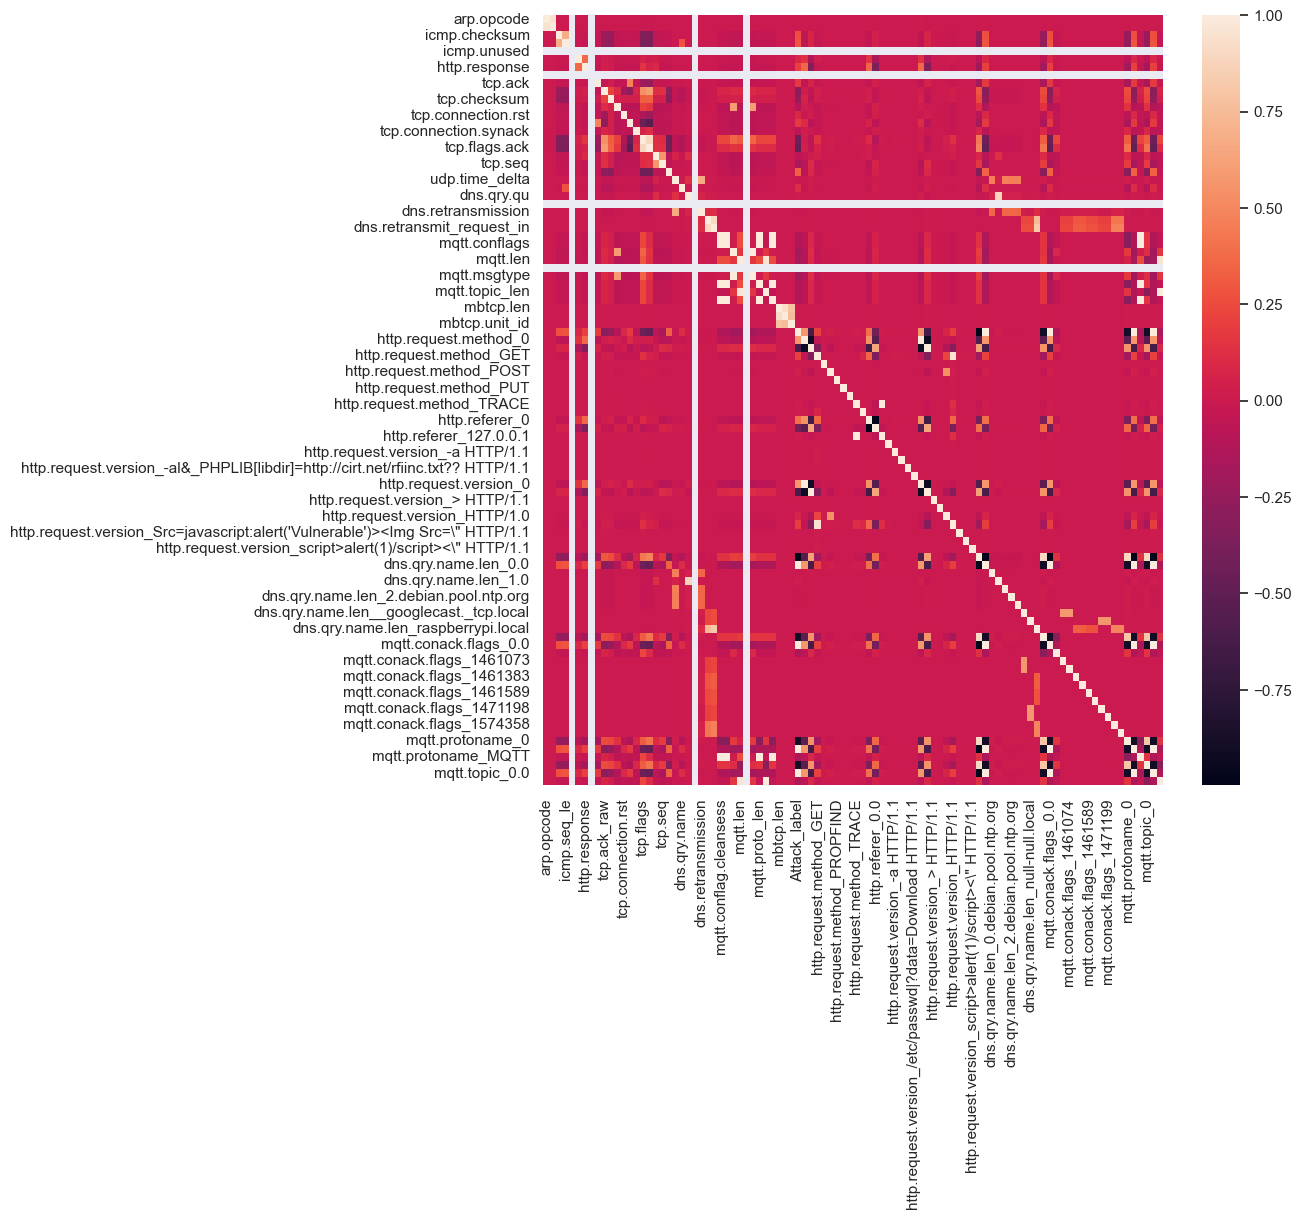

In [18]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr())
plt.show()
print(df.corr())